<a href="https://colab.research.google.com/github/gaurangsahu99/Topic-modelling-on-BBC-s-News-Article/blob/main/unsupervised_machine_learning_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT NAME- TOPIC MODELLING ON NEWS ARTICLES.

PROJECT TYPE- UNSUPREVISED MACHINE LEARNING

CONTRIBUTUION- INDIVIDUAL (CAPSTONE PROJECT BY GAURANG SAHU)

PROJECT SUMMARY--

It is an operational business division of the British Broadcasting Corporation (BBC) responsible for the gathering and broadcasting of news and current affairs in the UK and around the world. The department is the world's largest broadcast news organisation and generates about 120 hours of radio and television output each day, as well as online news coverage. The service maintains 50 foreign news bureaus with more than 250 correspondents around the world.

GITHUB PROJECTS'S LINK--

PROBLEM STATEMENT--The Data provided is divided into 5 categories, that are, Sports, Tech, Business, Entertainment and Politics. Across these folders the data is stored in form of text files such that each text file contains the complete transcript of the article.

The dataset in this case isn't collective, it has been stored in form of numerous text files sub-categorized in 5 different domains. First I segregated the data by traversing all these folders and storing the data present in the files to a data-frame.


In this project, the task is to identify major themes/topics across a collection of BBC news articles.


In [ ]:
!pip uninstall scikit-learn                    #the version of google colab is suddenly updated to 1.1.4 but our code is running perfecly fine in 1.1.3
!pip install scikit-learn==1.1.3               #please enter 'y' then hit enter key to proceed.

Found existing installation: scikit-learn 1.1.3
Uninstalling scikit-learn-1.1.3:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/scikit_learn-1.1.3.dist-info/*
    /usr/local/lib/python3.9/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.9/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.1.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30.8 MB)


**please press "y" key then enter to proceed**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.stem.snowball import SnowballStemmer

import nltk
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob, Word

from sklearn.decomposition import LatentDirichletAllocation

from sklearn.model_selection import GridSearchCV







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
directory='/content/drive/MyDrive/bbc/' #we have added an additional / in the copied address

In [ ]:
subdirs = ['business', 'entertainment', 'politics', 'sport', 'tech']   #differnt sub directories.


In [ ]:
bbc = pd.DataFrame()


In [ ]:
import os


In [ ]:
for subdir in subdirs:
 dir = directory + '/' + subdir
 for filename in os.listdir(dir):                                                #os.listdir() method in python is used to get the list of all files and directories in the specified directory.
                                                                                 # If we don’t specify any directory, then list of files and directories in the current working directory will be returned.
  filepath = os.path.join(dir, filename)
  try:
      data = open(filepath,'r').read()

      # escape characters to be ignored in the text
      escape = ['\n']

      # removing escape characters from text
      for elem in escape:
        data = data.replace(elem, ' ')

      # Storing article to the dataframe
      dict1 = {'Filename': filename.split('.')[0], 'Contents': data.lower(), 'Category':subdir}
      bbc = bbc.append(dict1, ignore_index=True, verify_integrity = True)

  except:
    pass


<ipython-input-8-9723be6421e5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bbc = bbc.append(dict1, ignore_index=True, verify_integrity = True)
<ipython-input-8-9723be6421e5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bbc = bbc.append(dict1, ignore_index=True, verify_integrity = True)
<ipython-input-8-9723be6421e5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bbc = bbc.append(dict1, ignore_index=True, verify_integrity = True)
<ipython-input-8-9723be6421e5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bbc = bbc.append(dict1, ignore_index=True, verify_integrity = True)
<ipython-input-8-9723be6421e5>:17: FutureWarning

In [ ]:
bbc

,Filename,Contents,Category
0,003,yukos unit buyer faces loan claim the owners ...,business
1,001,ad sales boost time warner profit quarterly p...,business
2,002,dollar gains on greenspan speech the dollar h...,business
3,024,us trade gap hits record in 2004 the gap betw...,business
4,004,high fuel prices hit ba's profits british air...,business
...,...,...,...
2219,397,bt program to beat dialler scams bt is introd...,tech
2220,362,bad e-mail habits sustains spam the 'bad beha...,tech
2221,369,microsoft plans 'safer id' system microsoft i...,tech
2222,388,camera phones are 'must-haves' four times mor...,tech


<Axes: xlabel='Category', ylabel='count'>

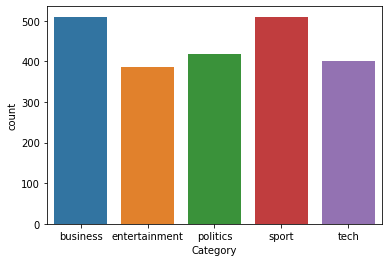

In [ ]:
sns.countplot(data=bbc, x="Category")               #seaborn countplot to valuecount roomtypes in different region.



In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
bbc['Contents'] = bbc['Contents'].apply(remove_punctuation)
bbc.head(10)

,Filename,Contents,Category
0,003,yukos unit buyer faces loan claim the owners ...,business
1,001,ad sales boost time warner profit quarterly p...,business
2,002,dollar gains on greenspan speech the dollar h...,business
3,024,us trade gap hits record in 2004 the gap betw...,business
4,004,high fuel prices hit bas profits british airw...,business
5,019,india widens access to telecoms india has rai...,business
6,025,yukos loses us bankruptcy battle a judge has ...,business
7,011,ask jeeves tips online ad revival ask jeeves ...,business
8,012,indonesians face fuel price rise indonesias g...,business
9,014,telegraph newspapers axe 90 jobs the daily an...,business


In [ ]:
# Reindexing the data
reindexed_data = bbc.reset_index()

# Extracting contents of all articles
reindexed_data = reindexed_data["Contents"]

# Display
reindexed_data

0       yukos unit buyer faces loan claim  the owners ...
1       ad sales boost time warner profit  quarterly p...
2       dollar gains on greenspan speech  the dollar h...
3       us trade gap hits record in 2004  the gap betw...
4       high fuel prices hit bas profits  british airw...
                              ...                        
2219    bt program to beat dialler scams  bt is introd...
2220    bad email habits sustains spam  the bad behavi...
2221    microsoft plans safer id system  microsoft is ...
2222    camera phones are musthaves  four times more m...
2223    beckham virus spotted on the net  virus writer...
Name: Contents, Length: 2224, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
def stopwords(text):

    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
bbc['Contents'] = bbc['Contents'].apply(stopwords)
bbc.head(10)

,Filename,Contents,Category
0,003,yukos unit buyer faces loan claim owners embat...,business
1,001,ad sales boost time warner profit quarterly pr...,business
2,002,dollar gains greenspan speech dollar hit highe...,business
3,024,us trade gap hits record 2004 gap us exports i...,business
4,004,high fuel prices hit bas profits british airwa...,business
5,019,india widens access telecoms india raised limi...,business
6,025,yukos loses us bankruptcy battle judge dismiss...,business
7,011,ask jeeves tips online ad revival ask jeeves b...,business
8,012,indonesians face fuel price rise indonesias go...,business
9,014,telegraph newspapers axe 90 jobs daily sunday ...,business


In [ ]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):

    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)

    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

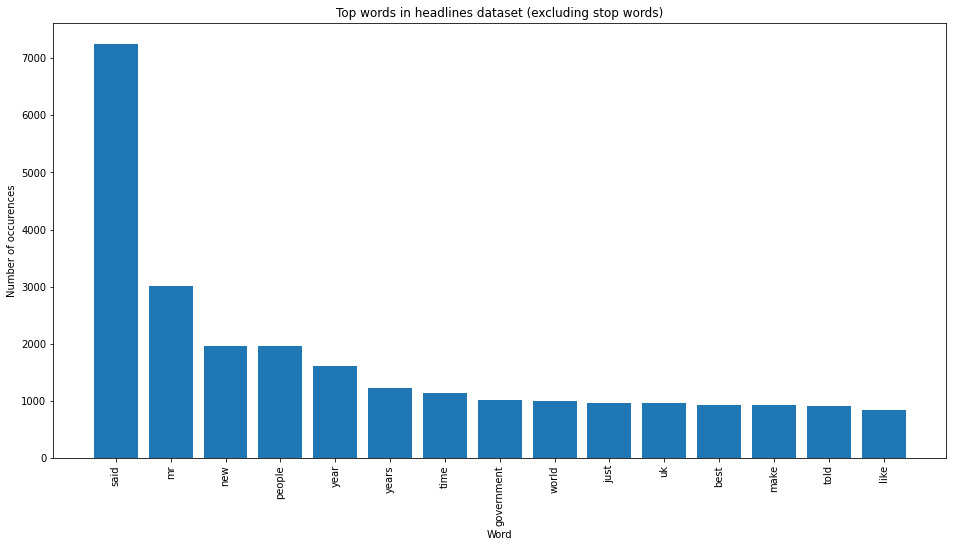

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer,
                                     text_data=reindexed_data)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in headlines dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

In [ ]:
# downloading wordNet lemmatizer
nltk.download(['wordnet','omw-1.4'])
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# lemmatizing an article to see what wordnet returns
for rows in reindexed_data:
 print(rows)
 test = [lemmatizer.lemmatize(words) for words in rows.split(' ')]
 print(test)
 break


yukos unit buyer faces loan claim  the owners of embattled russian oil giant yukos are to ask the buyer of its former production unit to pay back a 900m £479m loan  stateowned rosneft bought the yugansk unit for 93bn in a sale forced by russia to part settle a 275bn tax claim against yukos yukos owner menatep group says it will ask rosneft to repay a loan that yugansk had secured on its assets rosneft already faces a similar 540m repayment demand from foreign banks legal experts said rosnefts purchase of yugansk would include such obligations the pledged assets are with rosneft so it will have to pay real money to the creditors to avoid seizure of yugansk assets said moscowbased us lawyer jamie firestone who is not connected to the case menatep groups managing director tim osborne told the reuters news agency if they default we will fight them where the rule of law exists under the international arbitration clauses of the credit  rosneft officials were unavailable for comment but the c

In [ ]:
count_vectorizer = CountVectorizer(stop_words ='english', max_features = 4000)
text_sample = reindexed_data
document_term_matrix = count_vectorizer.fit_transform(text_sample)



In [ ]:
# hyperparameter tuning using Grid Search CV
grid_params = {'n_components' : [5]}

# creating LDA model object
lda = LatentDirichletAllocation()

# fitting the model
lda_model = GridSearchCV(lda, param_grid = grid_params)
lda_model.fit(document_term_matrix)

# best LDA model
best_lda_model = lda_model.best_estimator_
print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(document_term_matrix))

Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -599588.488384276
LDA model Perplexity on train data 1590.463456895077


In [ ]:
!pip install pyLDAvis


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [ ]:
print('Testing')
print(count_vectorizer.get_feature_names())
print('Testing Finished')
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, document_term_matrix, count_vectorizer, mds='tsne')
lda_panel


Testing
['01', '03', '10', '100', '1000', '10000', '100000', '100m', '10bn', '11', '11bn', '12', '13', '14', '15', '150', '150000', '1500m', '15bn', '16', '17', '18', '19', '1960s', '1970s', '1980s', '1983', '1984', '1985', '1987', '1990s', '1992', '1993', '1994', '1995', '1997', '1998', '1999', '1bn', '1m', '20', '200', '2000', '20000', '200000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '200m', '2010', '20th', '21', '22', '23', '24', '25', '250', '26', '27', '27bn', '28', '29', '2bn', '30', '300', '3000', '31', '31yearold', '32', '33', '34', '35', '35bn', '36', '37', '38', '3bn', '3d', '3g', '40', '400', '400m', '40m', '41', '42', '43', '44', '45', '46', '47', '48', '4s', '50', '500', '5000', '50000', '500000', '50m', '51', '52', '53', '54', '55', '57', '60', '6000', '60m', '61', '62', '63', '64', '65', '67', '70', '75', '76', '80', '800m', '85', '86', '90', '911', 'ability', 'able', 'abroad', 'absence', 'absolute', 'absolutely', 'abuse', 'abused', 'ac',

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4       64.616364  -95.015633       1        1  25.345816
1      105.690453 -202.117523       2        1  22.777873
2       -9.461698 -232.256927       3        1  19.492112
0      -33.530754  -35.185703       4        1  18.556346
3      -82.197884 -143.850449       5        1  13.827852, topic_info=            Term         Freq        Total Category  logprob  loglift
2390          mr  2989.000000  2989.000000  Default  30.0000  30.0000
1455        film   817.000000   817.000000  Default  29.0000  29.0000
475         best   910.000000   910.000000  Default  28.0000  28.0000
2402       music   813.000000   813.000000  Default  27.0000  27.0000
1637  government  1020.000000  1020.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
3220      series   135.475367   248.798675   Topic5  -5.8682   1.3706
3653        time   157.445311  1133.171091   Topic5  -5.7179   0.0048
2625      people   143.808277  1947.675201   Topic5  -5.8085  -0.6274
3961       world   140.171080   988.862057   Topic5  -5.8341   0.0248
2326     million   136.617518   563.048028   Topic5  -5.8598   0.5623

[365 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
48        1  0.030628   2004
48        2  0.170871   2004
48        3  0.066092   2004
48        4  0.578706   2004
48        5  0.154751   2004
...     ...       ...    ...
3987      2  0.114253  years
3987      3  0.187110  years
3987      4  0.235130  years
3987      5  0.320405  years
3998      2  0.995816  yukos

[736 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 3, 1, 4])

In [ ]:
docterms = lda_panel.token_table.sort_values(by = ['Freq'], ascending=False)


In [ ]:
docterms


,Topic,Freq,Term
term,,,
3249,4,0.998796,shares
3675,1,0.998464,tory
401,5,0.998381,awards
3674,1,0.998114,tories
3333,2,0.998112,software
...,...,...,...
2591,2,0.001924,party
497,5,0.001884,blair
1572,5,0.001588,games


In [ ]:
docterms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 736 entries, 3249 to 3750
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Topic   736 non-null    int64  
 1   Freq    736 non-null    float64
 2   Term    736 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.0+ KB


<Axes: xlabel='Term', ylabel='Freq'>

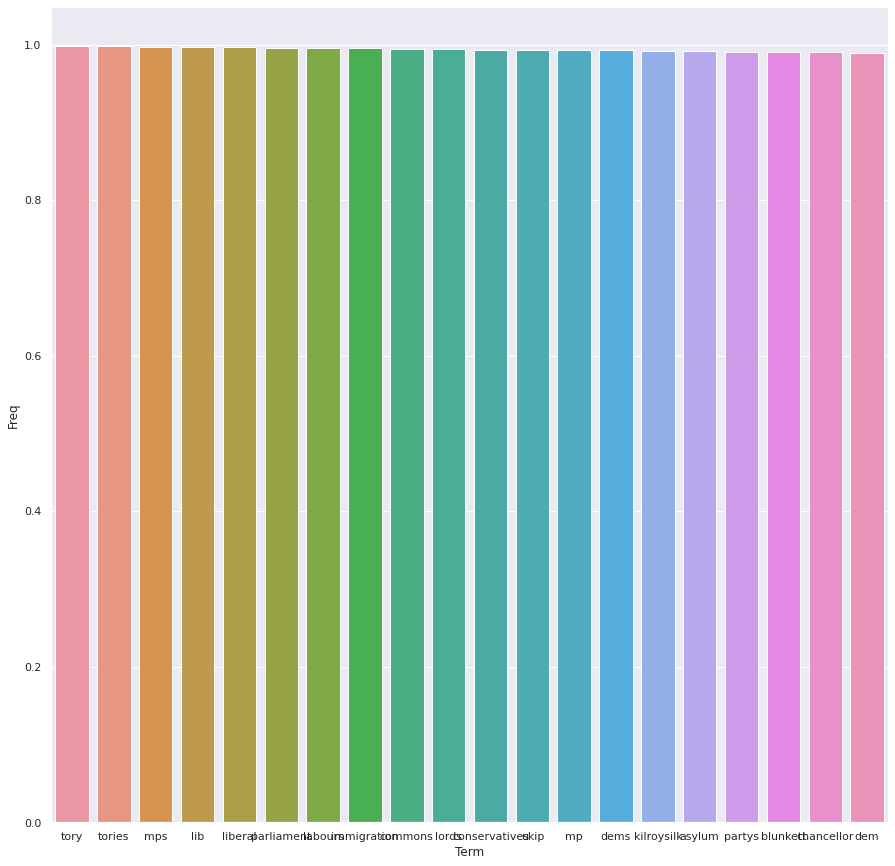

In [ ]:
politics=docterms[docterms['Topic']==1].head(20)
sns.set(rc={'figure.figsize':(15,15)})
sns.barplot(data=politics, x='Term', y ='Freq')                       #plotting using seaborn library.


<Axes: xlabel='Term', ylabel='Freq'>

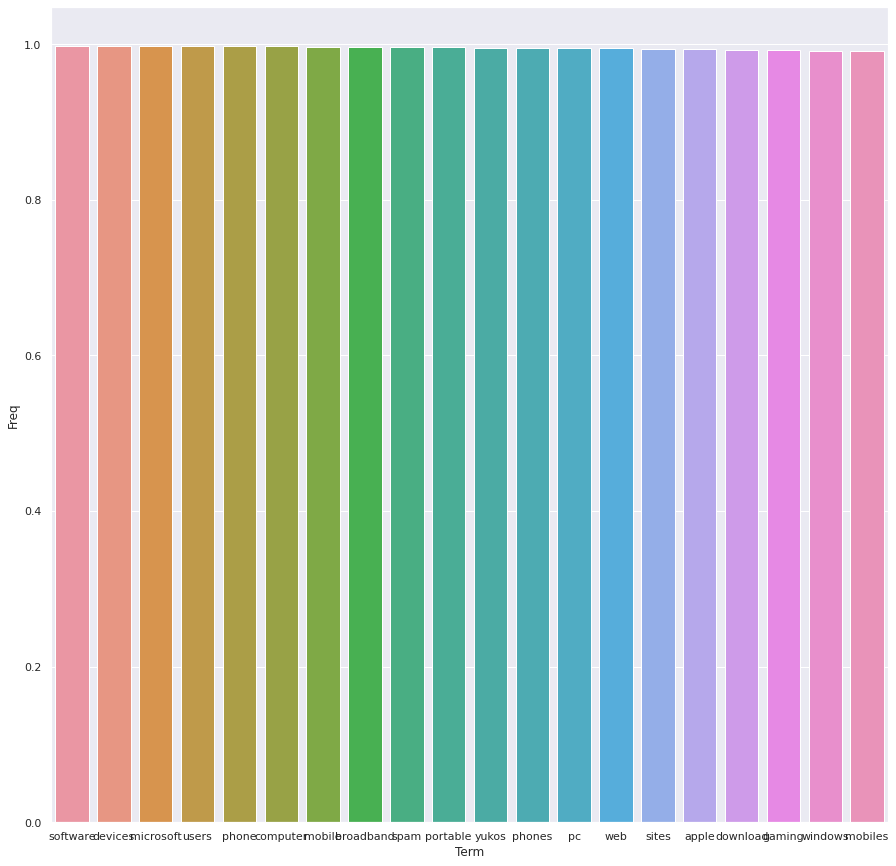

In [ ]:
tech=docterms[docterms['Topic']==2].head(20)
sns.set(rc={'figure.figsize':(15,15)})
sns.barplot(data=tech, x='Term', y ='Freq')


<Axes: xlabel='Term', ylabel='Freq'>

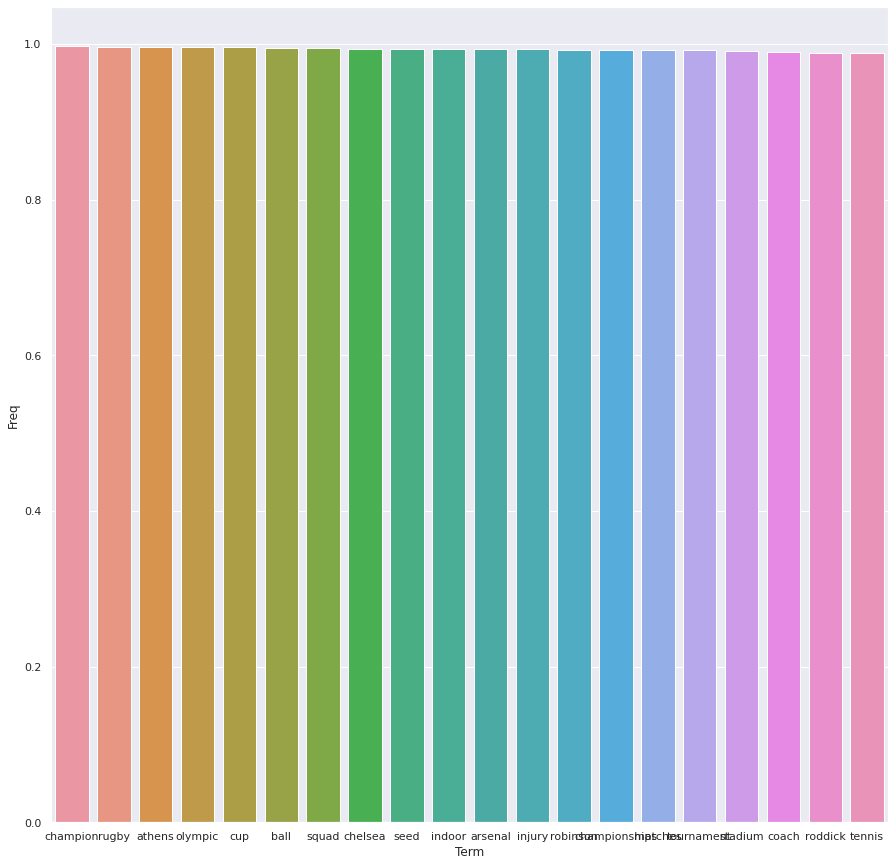

In [ ]:
business=docterms[docterms['Topic']==3].head(20)
sns.set(rc={'figure.figsize':(15,15)})
sns.barplot(data=business, x='Term', y ='Freq')


<Axes: xlabel='Term', ylabel='Freq'>

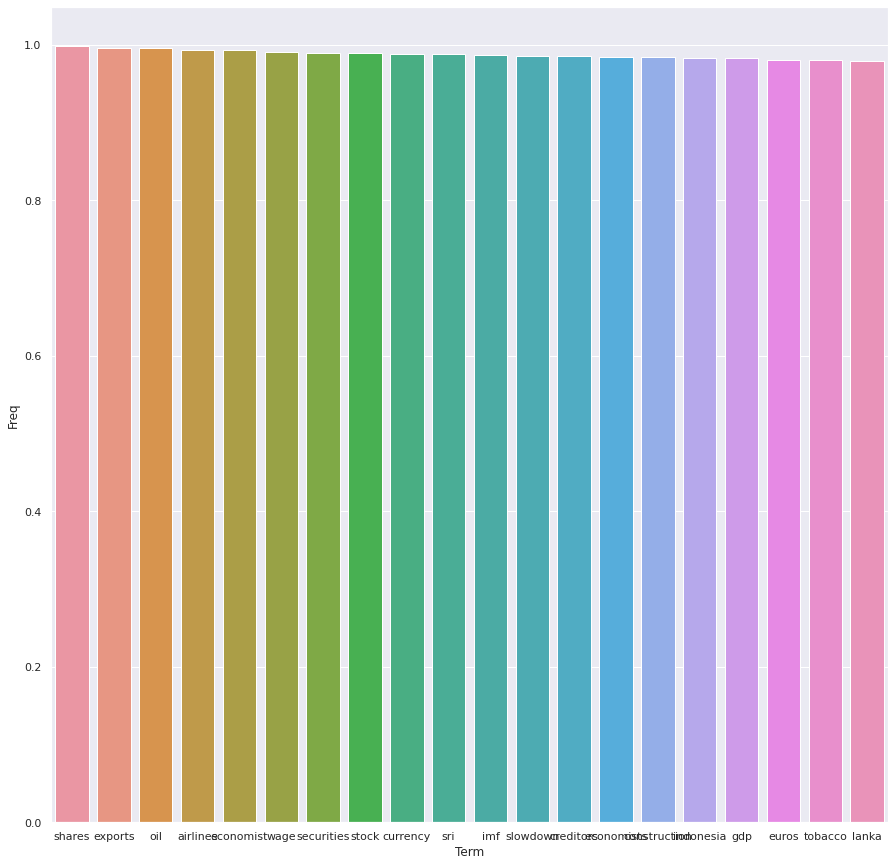

In [ ]:
sports=docterms[docterms['Topic']==4].head(20)
sns.set(rc={'figure.figsize':(15,15)})
sns.barplot(data=sports, x='Term', y ='Freq')


<Axes: xlabel='Term', ylabel='Freq'>

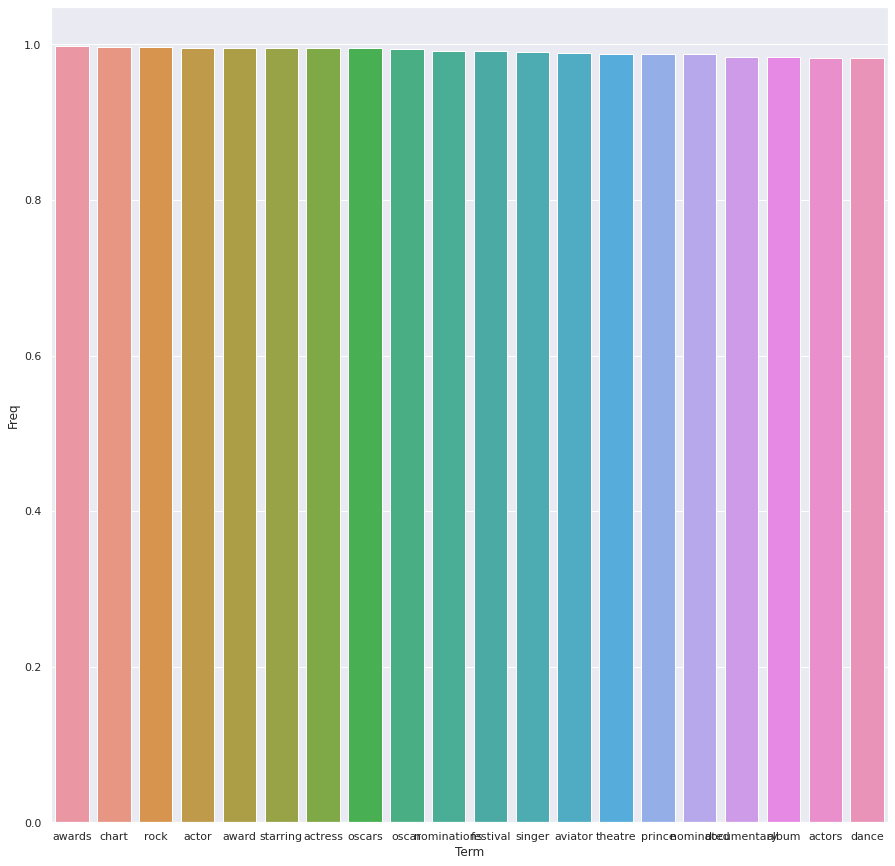

In [ ]:
entertainment=docterms[docterms['Topic']==5].head(20)
sns.set(rc={'figure.figsize':(15,15)})
sns.barplot(data=entertainment, x='Term', y ='Freq')

**conclusion**

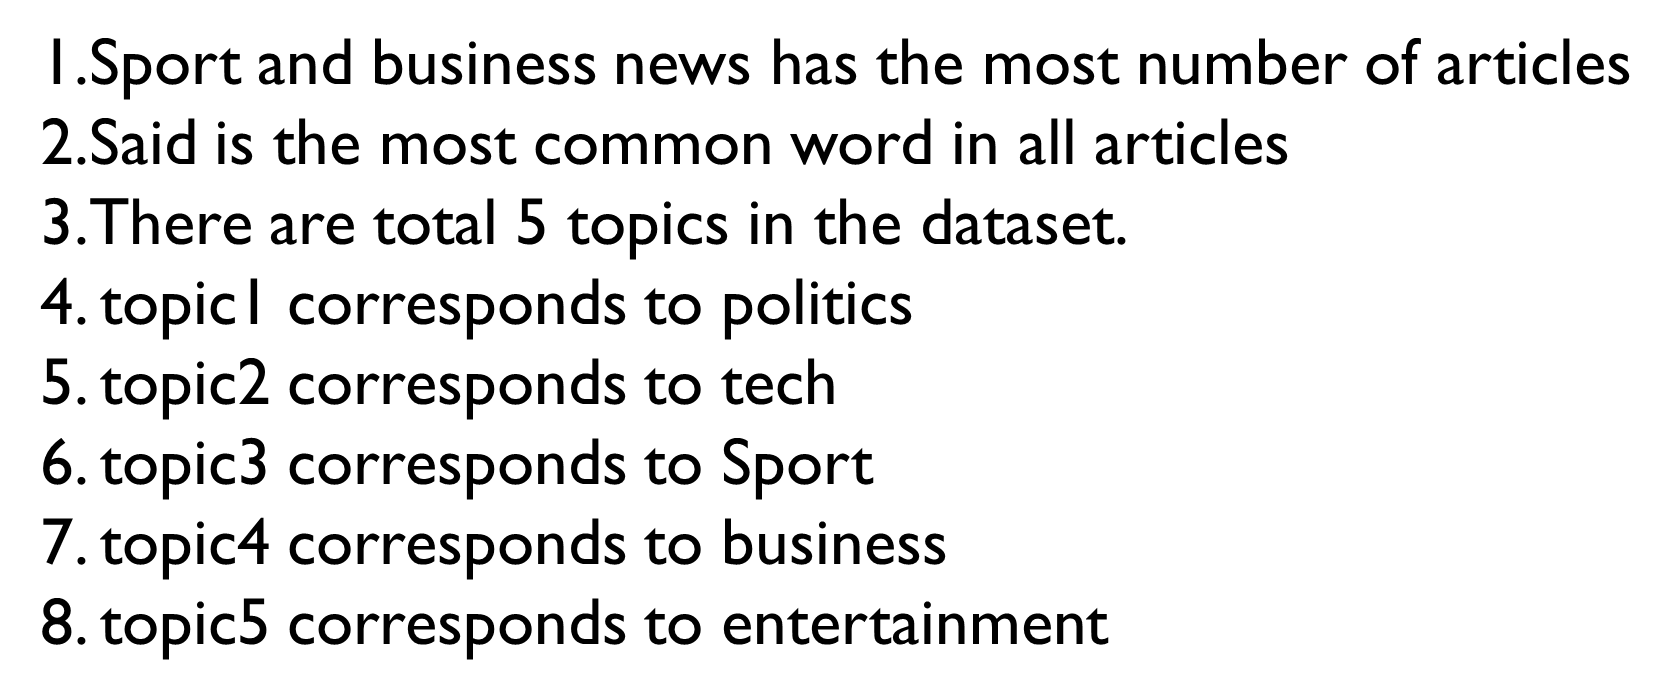